In [184]:
import pandas as pd
import utils
import numpy
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline

# Data and Subtasks

### Data - Sites

We will show a case study of the using our optimization in 4 situations: 2 different scales (residential vs. industry) and in two locations. For now, I chose the locations as

San Luis Obispo, CA

Salem, OR

## Subtask 1: Energy price modeling

## Subtask 2: PV output modeling

## Subtask 3: Energy Demand modeling

## Subtask 4: Battery State of Health modeling

## Subtask 5: Optimization Procedure

In [121]:
#This section is for downloading Energy Price Data

# FOOTHILL_1_N001 - corresponds to San Luis Ob Solar data
start_times = ['20161101','20161201','20161231','20170130','20170227','20170326','20170425','20170524','20170623','20170722','20170821','20170920','20171019']
end_times = ['20161201','20161231','20170130','20170227','20170326','20170425','20170524','20170623','20170722','20170821','20170920','20171019','20171101']

#Can only request data for 30 days at a time
xml_fns = []
for j in range(2,13):
    URL = 'http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_LMP&startdatetime=' + start_times[j] + 'T07:00-0000&enddatetime=' + end_times[j] + 'T07:00-0000&version=1&market_run_id=DAM&node=FOOTHILL_1_N001'
    fn = utils.get_data(URL,'zip')
    xml_fns.append(fn)



Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip


In [171]:

Node_location = 'HLCR_LNODEWR1' #Salem, OR
start_times = ['20161101','20161201','20161231','20170130','20170227','20170326','20170425','20170524','20170623','20170722','20170821','20170920','20171019']
end_times = ['20161201','20161231','20170130','20170227','20170326','20170425','20170524','20170623','20170722','20170821','20170920','20171019','20171101']

#Can only request data for 30 days at a time
xml_fns2 = []
for j in range(13):
    URL = 'http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_LMP&startdatetime=' + start_times[j] + 'T07:00-0000&enddatetime=' + end_times[j] + 'T07:00-0000&version=1&market_run_id=DAM&node=' + Node_location
    fn = utils.get_data(URL,'zip')
    xml_fns2.append(fn)



Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip


In [125]:
xml_fns

['20161230_20170129_PRC_LMP_DAM_20171109_22_39_33_v1.xml',
 '20170129_20170226_PRC_LMP_DAM_20171109_22_44_32_v1.xml',
 '20170226_20170326_PRC_LMP_DAM_20171109_22_48_57_v1.xml',
 '20170326_20170425_PRC_LMP_DAM_20171109_22_52_29_v1.xml',
 '20170425_20170524_PRC_LMP_DAM_20171109_22_55_08_v1.xml',
 '20170524_20170623_PRC_LMP_DAM_20171109_22_56_31_v1.xml',
 '20170623_20170722_PRC_LMP_DAM_20171109_22_58_03_v1.xml',
 '20170722_20170821_PRC_LMP_DAM_20171109_22_59_27_v1.xml',
 '20170821_20170920_PRC_LMP_DAM_20171109_23_00_54_v1.xml',
 '20170920_20171019_PRC_LMP_DAM_20171109_23_02_18_v1.xml',
 '20171019_20171101_PRC_LMP_DAM_20171109_23_03_36_v1.xml',
 '20161101_20161130_PRC_LMP_DAM_20171109_22_24_58_v1.xml',
 '20161130_20161230_PRC_LMP_DAM_20171109_22_26_41_v1.xml']

In [142]:
soup

<?xml version="1.0" encoding="utf-8"?>
<OASISReport xmlns="http://www.caiso.com/soa/OASISReport_v1.xsd">
<MessageHeader>
<TimeDate>2017-11-10T06:31:35-00:00</TimeDate>
<Source>OASIS</Source>
<Version>v20131201</Version>
</MessageHeader>
<MessagePayload>
<RTO>
<name>CAISO</name>
<REPORT_ITEM>
<REPORT_HEADER>
<SYSTEM>OASIS</SYSTEM>
<TZ>PPT</TZ>
<REPORT>PRC_LMP</REPORT>
<MKT_TYPE>DAM</MKT_TYPE>
<UOM>US$/MWh</UOM>
<INTERVAL>ENDING</INTERVAL>
<SEC_PER_INTERVAL>3600</SEC_PER_INTERVAL>
</REPORT_HEADER>
<REPORT_DATA>
<DATA_ITEM>LMP_PRC</DATA_ITEM>
<RESOURCE_NAME>FOOTHILL_1_N001</RESOURCE_NAME>
<OPR_DATE>2016-11-30</OPR_DATE>
<INTERVAL_NUM>24</INTERVAL_NUM>
<INTERVAL_START_GMT>2016-12-01T07:00:00-00:00</INTERVAL_START_GMT>
<INTERVAL_END_GMT>2016-12-01T08:00:00-00:00</INTERVAL_END_GMT>
<VALUE>33.14032</VALUE>
</REPORT_DATA>
</REPORT_ITEM>
<REPORT_ITEM>
<REPORT_HEADER>
<SYSTEM>OASIS</SYSTEM>
<TZ>PPT</TZ>
<REPORT>PRC_LMP</REPORT>
<MKT_TYPE>DAM</MKT_TYPE>
<UOM>US$/MWh</UOM>
<INTERVAL>ENDING</INTERV

In [239]:
#This section is for parsing the Energy price data 
for jj in range(13):
    with open(xml_fns[jj], "r") as src:
        soup = BeautifulSoup(src, "xml")
    if jj == 1:
        df1 = df2
    if jj > 1:
        df1 = df1.append(df2)
    df2 = pd.DataFrame([
    {

        "LMP" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_PRC' else None,
        #"Energy" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_ENE_PRC',
        #"Loss" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_LOSS_PRC',
        #"Congestion" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_CONG_PRC',
        "time" : i.INTERVAL_START_GMT.text}
    for i in soup.OASISReport.findChildren("REPORT_DATA")]
    )

    df2 = df2.dropna(axis=0, how='any')
    if jj == 12:
        df1 = df1.append(df2)
    #Need to fix this to get unzipped filename even when already exists
    #utils.remove_data(URL,'zip')

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.


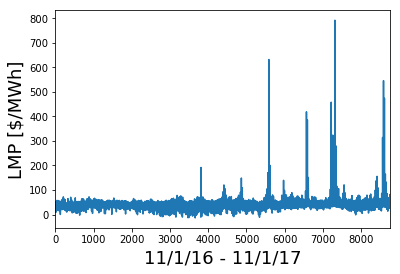

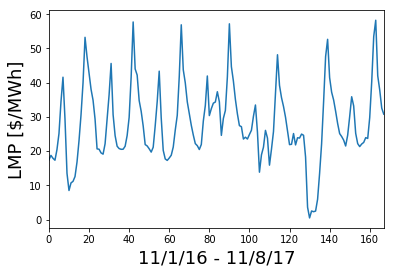

33.874308906392976

In [244]:
df1 = df1.sort_values('time')
df1.shape
#df4 = df1[['LMP']]
#df4 = df4.reset_index(drop=True)
#df4.LMP = df.LMP.astype(float)
#df4.LMP[:80]

df4 = df1.reset_index(drop=True)

df5 = df4.convert_objects(convert_numeric=True)

ax1 = df5.LMP.plot()
ax1.set_ylabel('LMP [$/MWh]', fontsize=18)
ax1.set_xlabel('11/1/16 - 11/1/17',fontsize=18)
plt.show()
ax2 = df5.LMP[:168].plot()
ax2.set_ylabel('LMP [$/MWh]', fontsize=18)
ax2.set_xlabel('11/1/16 - 11/8/17',fontsize=18)
plt.show()

df5.LMP.mean()

In [246]:
#This section is for parsing the Energy price data (Salem, OR)
for jj in range(13):
    with open(xml_fns2[jj], "r") as src:
        soup = BeautifulSoup(src, "xml")
    if jj == 1:
        df1 = df2
    if jj > 1:
        df1 = df1.append(df2)
    df2 = pd.DataFrame([
    {

        "LMP" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_PRC' else None,
        #"Energy" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_ENE_PRC',
        #"Loss" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_LOSS_PRC',
        #"Congestion" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_CONG_PRC',
        "time" : i.INTERVAL_START_GMT.text}
    for i in soup.OASISReport.findChildren("REPORT_DATA")]
    )

    df2 = df2.dropna(axis=0, how='any')
    if jj == 12:
        df1 = df1.append(df2)
    #Need to fix this to get unzipped filename even when already exists
    #utils.remove_data(URL,'zip')

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.


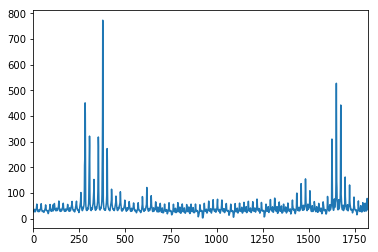

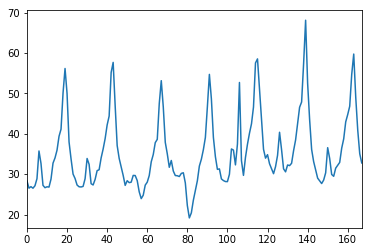

43.04649878837723

In [247]:
df1 = df1.sort_values('time')
df1.shape
#df4 = df1[['LMP']]
#df4 = df4.reset_index(drop=True)
#df4.LMP = df.LMP.astype(float)
#df4.LMP[:80]

df4 = df1.reset_index(drop=True)

df5 = df4.convert_objects(convert_numeric=True)

df5.LMP.plot()
ax1.set_ylabel('LMP [$/MWh]', fontsize=18)
ax1.set_xlabel('11/1/16 - 11/1/17',fontsize=18)
plt.show()
df5.LMP[:168].plot()
ax2.set_ylabel('LMP [$/MWh]', fontsize=18)
ax2.set_xlabel('11/1/16 - 11/8/17',fontsize=18)
plt.show()

df5.LMP.mean()

In [54]:
df = pd.DataFrame([
    {
        "time" : i.INTERVAL_START_GMT.text
        if i.DATA_ITEM.text == 'LMP_PRC'
            "LMP" : i.VALUE.text
        if i.DATA_ITEM.text == 'LMP_ENE_PRC'
            "Energy" : i.VALUE.text
        if i.DATA_ITEM.text == 'LMP_LOSS_PRC'
            "Loss" : i.VALUE.text
        if i.DATA_ITEM.text == 'LMP_CONG_PRC'
            "Congestion" : i.VALUE.text
        
    
    }
for i in soup.OASISReport.findChildren("REPORT_DATA")]
)
df

SyntaxError: invalid syntax (<ipython-input-54-73caad9f0082>, line 5)

In [ ]:
# Solar Data 
#SLO
http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2010/data/hourly/722897/722897_2010_solar.csv

#Salem
http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2010/data/hourly/726940/726940_2010_solar.csv

In [3]:
utils.remove_data(URL,'zip')

Removed 36c2ef9.zip


In [3]:
fn

'20130919_20130920_PRC_LMP_DAM_20171109_12_46_35_v1.xml'